In [1]:
! pip install -q pandas numpy scikit-learn seaborn matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [2]:
#dataset is separated by tab, so we use seperator='\t'
data = pd.read_csv(r'c:\Users\heave\ResearchVault_LabRecords\Github_Files\Machine_Learning\Supervised_Machine_Learning\Logistic_Regression\Project_Logistic_Regression\SMSSpamCollection.csv', sep='\t', names=['label', 'message'])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data['label'] = data.label.map({'ham':0, 'spam':1})
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['message'], 
                                                    data['label'], 
                                                    test_size =0.2, 
                                                    random_state=42)


print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4457
Number of rows in the test set: 1115


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [8]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train).toarray()

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test).toarray()

In [9]:
frequency_matrix = pd.DataFrame(training_data, columns = count_vector.get_feature_names_out())
frequency_matrix.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
testing_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
#Train the data
clf = LogisticRegression(random_state=0).fit(training_data, y_train)

In [12]:
#predict the value
predictions = clf.predict(testing_data)

In [13]:
predictions


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, predictions)) 

Accuracy score:  0.9883408071748879
Precision score:  1.0
Recall score:  0.912751677852349
F1 score:  0.9543859649122807

Confusion Matrix :
 [[966   0]
 [ 13 136]]


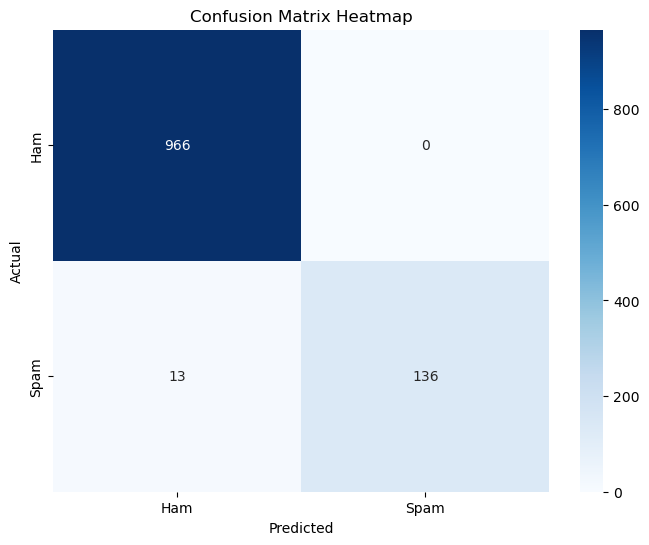

In [15]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()